In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r".\spam.csv",encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Data Cleaning

In [3]:
df.drop(["Unnamed: 4","Unnamed: 3","Unnamed: 2"],inplace =True,axis=1)
df.sample(5)

,v1,v2
3171,ham,Do u still have plumbers tape and a wrench we ...
5561,ham,Get me out of this dump heap. My mom decided t...
4043,ham,"Yes, my reg is Ciao!"
383,ham,Hey i will be late ah... Meet you at 945+
4269,ham,Great. Hope you are using your connections fro...


In [4]:
df.shape

(5572, 2)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(5169, 2)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["v1"]=encoder.fit_transform(df["v1"])

In [8]:
df.rename(columns={"v1":"Classify","v2":"Email"},inplace=True)
df.head()

,Classify,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

Classify    0
Email       0
dtype: int64

#EDA

Text(0.5, 1.0, 'Spam vs Ham')

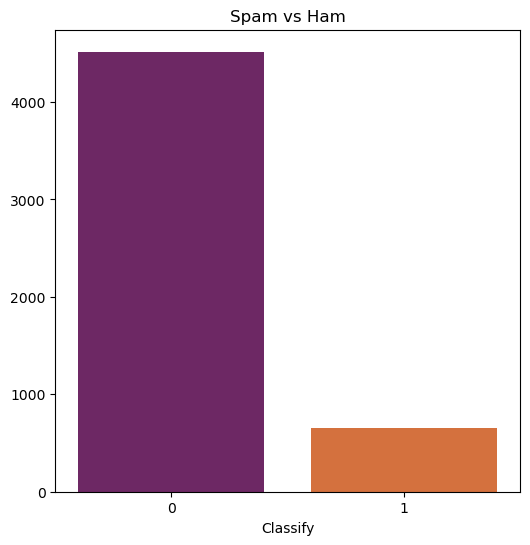

In [10]:
plt.figure(figsize=(6,6))
sns.barplot(x=df.Classify.value_counts().index,y=df.Classify.value_counts().values,palette="inferno")
plt.title("Spam vs Ham")

In [11]:
df.rename(columns={"word_count":"char_count"},inplace=True)

In [12]:
df["char_count"] = df["Email"].apply(len)
df.head()

,Classify,Email,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df.head()

,Classify,Email,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
def split(text):
    li = text.split(",")
    return len(li)


df["sentence_count"] = df["Email"].apply(split)


In [15]:
df.head()

,Classify,Email,char_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2


Text(0.5, 1.0, 'char count')

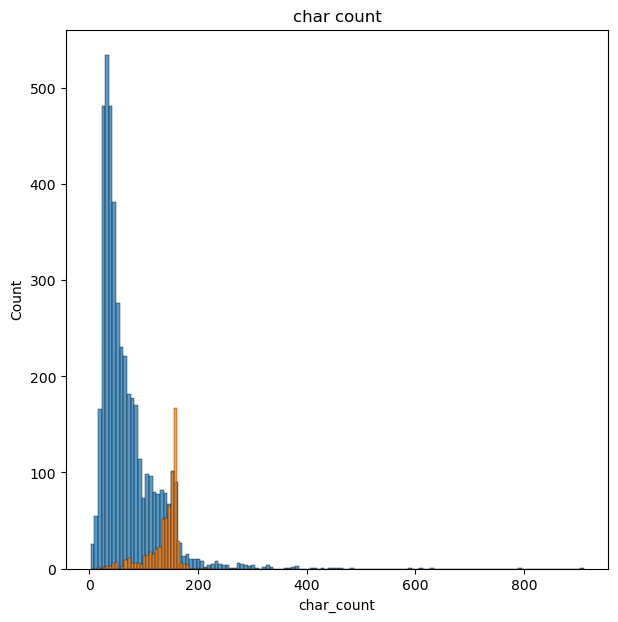

In [16]:
plt.figure(figsize=(7,7))
sns.histplot(df[df["Classify"]==0]["char_count"])
sns.histplot(df[df["Classify"]==1]["char_count"])
plt.title("char count")

In [17]:
df[["char_count","sentence_count"]].describe()

,char_count,sentence_count
count,5169.000000,5169.000000
mean,78.977945,1.323854
std,58.236293,0.771727
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,1.000000
max,910.000000,14.000000


In [18]:
import string

In [19]:
def clean_msg(msg):
    msg = msg.lower()
    msg = msg.split(" ")
    
    y = []
    for i in msg:
        if i.isalnum():
            y.append(i)
    
    arr2= y[:]
    y.clear()
    
    for i in arr2:
        if i not in string.punctuation:
            y.append(i)
            
    

    return " ".join(y)


df["Cleaned_msg"]=df["Email"].apply(clean_msg)
df.head()

,Classify,Email,char_count,sentence_count,Cleaned_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go until jurong available only in bugis n grea...
1,0,Ok lar... Joking wif u oni...,29,1,ok joking wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say so early u c already then
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i think he goes to he lives around here th...


#word cloud

In [20]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [21]:
wordfull = wc.generate(df['Cleaned_msg'].str.cat(sep=" "))

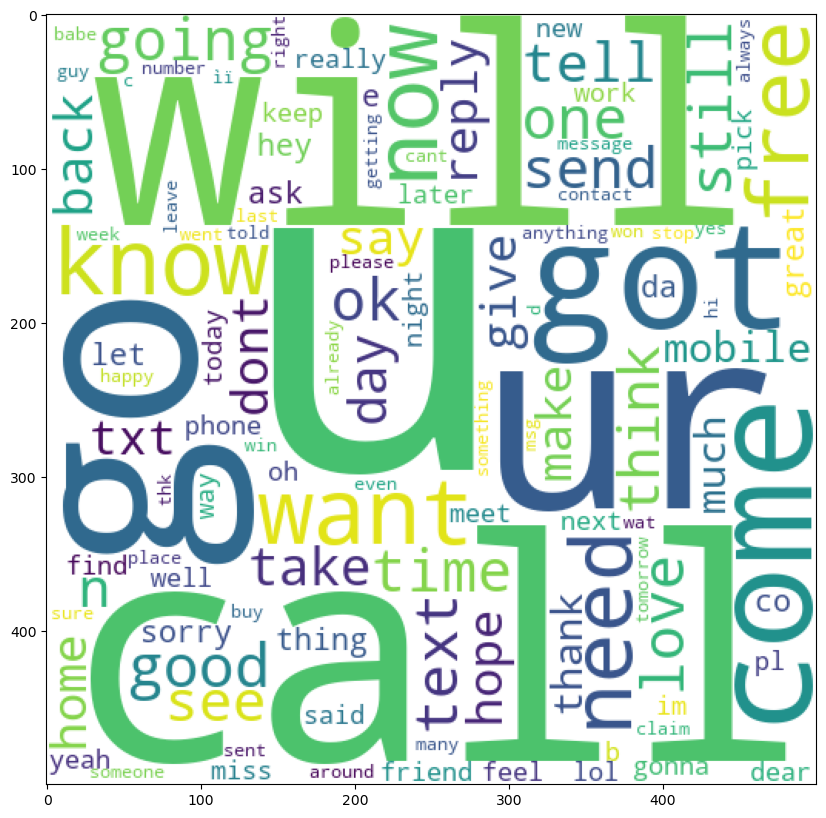

In [22]:
plt.figure(figsize=(15,10))
plt.imshow(wordfull)

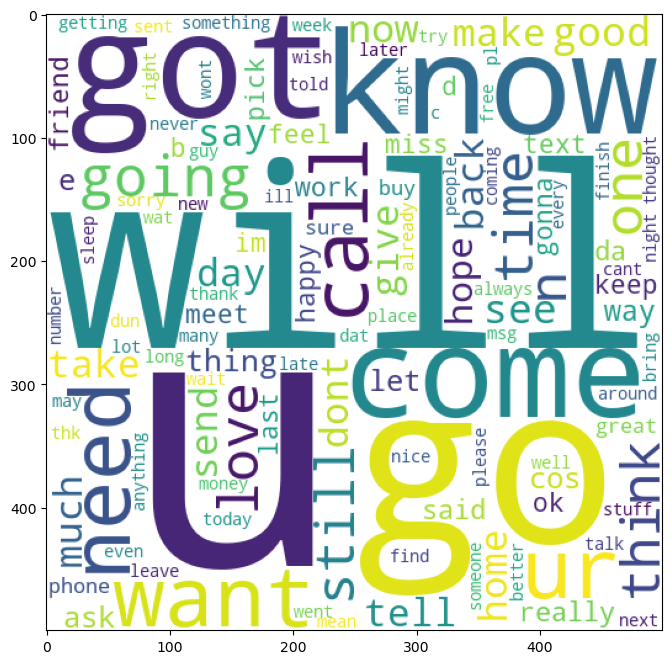

In [23]:
#ham

ham_cloud = wc.generate(df[df["Classify"]==0]["Cleaned_msg"].str.cat(sep=""))

plt.figure(figsize=(12,8))
plt.imshow(ham_cloud)

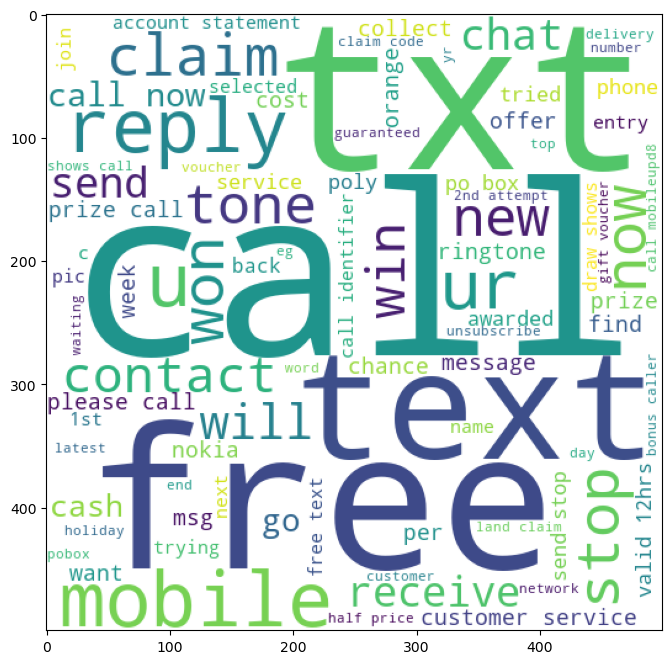

In [24]:
#spam
spam_cloud = wc.generate(df[df["Classify"]==1]["Cleaned_msg"].str.cat(sep=""))

plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)

#Classification

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfid = TfidfVectorizer(max_features=3000)
c_vect = CountVectorizer()

In [26]:
y = df["Classify"].values.astype("int")

x= tfid.fit_transform(df["Cleaned_msg"]).toarray()


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)



In [27]:
X_train.shape

(4135, 3000)

In [28]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

mb= MultinomialNB()
mb.fit(X_train,y_train)
pred=mb.predict(X_test)
print("accuracy_score  ",accuracy_score(y_test,pred))
print("confusion_matrix")
print(confusion_matrix(y_test,pred))
print("precision_scor  ",precision_score(y_test,pred))


accuracy_score   0.9564796905222437
confusion_matrix
[[894   0]
 [ 45  95]]
precision_scor   1.0


In [29]:
bnb =BernoulliNB()
bnb.fit(X_train,y_train)
bnb_pred=bnb.predict(X_test)
print("accuracy_score  ",accuracy_score(y_test,pred))
print("confusion_matrix")
print(confusion_matrix(y_test,pred))
print("precision_scor  ",precision_score(y_test,pred))

accuracy_score   0.9564796905222437
confusion_matrix
[[894   0]
 [ 45  95]]
precision_scor   1.0


In [30]:
#Count vector

# cv_y= df["Classify"].values.astype("int")
# cv_x = df["Cleaned_msg"]

# cv_x = c_vect.fit_transform(cv_x)

# cv_X_train,cv_X_test,cv_y_train,cv_y_test = train_test_split(cv_x,cv_y,test_size=0.2,random_state=3)

# cv_mnb =MultinomialNB()

# mb.fit(cv_X_train,cv_y_train)
# cv_pred=mb.predict(cv_X_test)
# print("accuracy_score  ",accuracy_score(cv_y_test,cv_pred))
# print("confusion_matrix")
# print(confusion_matrix(cv_y_test,cv_pred))
# print("precision_scor  ",precision_score(cv_y_test,cv_pred))

In [31]:
#load model
import pickle
pickle.dump(tfid,open("vectorizerV5.pkl","wb"))
pickle.dump(bnb,open("modelV5.pkl","wb"))

In [32]:
c_vic = pickle.load(open(r".\vectorizerV5.pkl",'rb'))
model = pickle.load(open(r".\modelV5.pkl",'rb'))

email = "u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020"

tran = clean_msg(email)
vic  = c_vic.transform([tran])
result = model.predict(vic)[0]

print(result)

1
